In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data=pd.read_csv('Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
#There are no null values in the data

In [9]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data1=pd.DataFrame(sc.fit_transform(data), columns=data.columns)
data1.shape

(178, 13)

# Clustering methods

## 1. kmeans clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss=[]

warnings.filterwarnings('ignore')

for i in range (1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[2314.0,
 1659.0079672511501,
 1277.928488844642,
 1175.7051928197118,
 1104.861683962532,
 1042.3872037251417,
 988.0533283180057,
 940.7081650896529,
 902.0783170433883,
 866.7991687164844,
 816.9778775673813,
 802.8796543612843]

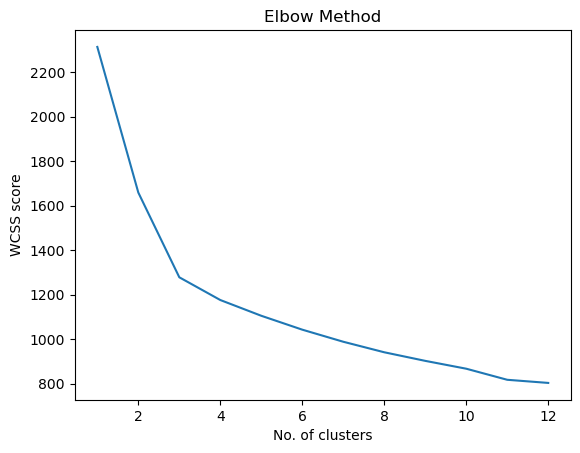

In [13]:
#Plot the graph between wcss and number of clusters to find the optimum number of clusters

plt.plot(range(1,13),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS score')
plt.show()

In [14]:
#From the above graph we got the optimum number of clusters to be 3.

kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data1)

In [15]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [16]:
#Finding the silhouette score

from sklearn.metrics import silhouette_score
silhouette_sc=silhouette_score(data1,y_kmeans)
print(silhouette_sc)

0.2848589191898987


## 2. Agglomerative Clustering 

### Plotting Dendrogram to find the optimum number of clusters 

In [17]:
import scipy.cluster.hierarchy as sch

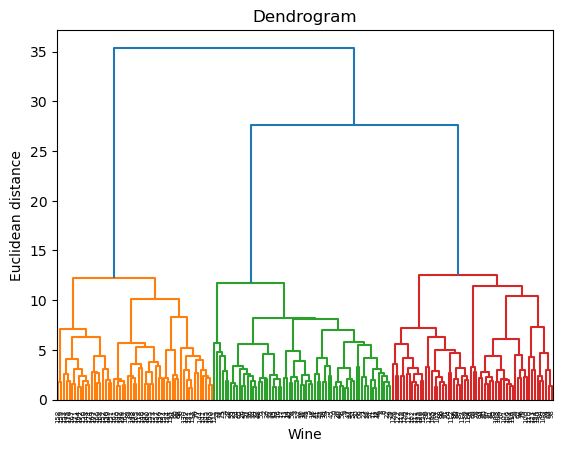

In [18]:
dendrogram=sch.dendrogram(sch.linkage(data1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean distance')
plt.show()

In [19]:
#From the graph we got the optimum number of clusters to be 3.

from sklearn.cluster import AgglomerativeClustering

In [20]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [21]:
hc

AgglomerativeClustering(n_clusters=3)

In [22]:
y_hc=hc.fit_predict(data1)

In [23]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [24]:
#Calculating the silhouette score

from sklearn.metrics import silhouette_score
silhoutte_avg=silhouette_score(data1,y_hc)
print(silhoutte_avg)

0.2774439826952265


## 3. DBSCAN Clustering 

In [25]:
#DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
#Clusters are dense regions in dataspace separated by regions of lower density of points.The DBSCAN algorithm is based on the intuitive notion of 'clusters' and 'noise'.
#The key idea in DBSCAN clustering is that for each point of a cluster the neighborhood of a given radius has to contain atleast a minimum number of points.
#kmeans and agglomerative clustering are suitable for compact and well separated clusters.They are also affected by the presence of noise and outliers in data.

#Real life data may contain irregularities like:
# 1.Clusters can be of arbitrary shape
# 2.Data may contain noise
#In such cases kmeans and agglomerative clustering is not a better option.
#Here we use DBSCAN clustering.

#DBSCAN algorithm requires two parameters-epsilon and minpts.
#epsilon defines the neighborhood around a datapoint i.e., if the distance between two points is lower or equal to 'epsilon' then they are considered as neighbors. 
#we find the epsilon value from the k-distance plot
#MinPts is the minimum number of neighbors(data points) within epsilon radius.The larger the dataset, the larger should be MinPts.As a general rule, the MinPts>=D+1,where D is the dimension of the dataset.The MinPts must be atleast 3.

#In this algorithm we have three types of datapoints:
# 1. Core point: A point is a Core Point if it has more than MinPts within the epsilon radius.
# 2. Border point: A point is a Border Point if it has fewer than MinPts within the epsilon radius but it is in the neighborhood of Core Point.
# 3. Noise: A point which is not a core point or border point.

#DBSCAN algorithm:
#1. Find all the neighbor points within epsilon and identify the Core Point or visited with more than MinPts neighbors.
#2. For each Core Point if it is not already assigned to a cluster,create a new cluster.
#3. Find recursively all its density connected points and assign them to the same cluster as the Core Point.
#4. Iterate through the remaining unvisited points in the dataset.Those points that do not belong to any cluster are noise.

In [26]:
from sklearn.neighbors import NearestNeighbors

In [27]:
#k-distance plot to find the epsilon value

neighbors=NearestNeighbors(n_neighbors=14)
neighbors_fit=neighbors.fit(data1)
distances,indices=neighbors_fit.kneighbors(data1)

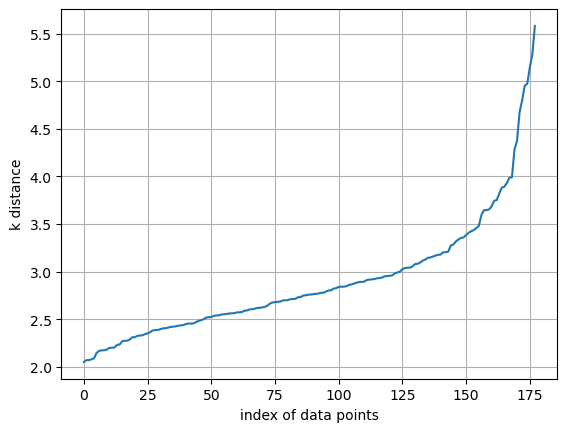

In [28]:
distances=np.sort(distances,axis=0)
distances=distances[:,13]
plt.plot(distances)
plt.xlabel('index of data points')
plt.ylabel('k distance')
plt.grid()
plt.show()

In [29]:
#From the above graph we get the epsilon value to be 3.9(this value is obtained from the graph where the graph has maximum curvature)

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
db=DBSCAN(eps=3.9,min_samples=14)
db.fit(data1)

DBSCAN(eps=3.9, min_samples=14)

In [32]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [33]:
#Calculating the silhouette score

from sklearn.metrics import silhouette_score
silhoutte_avg1=silhouette_score(data1,db.labels_)
print(silhoutte_avg1)

0.2443321139344842
